In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

df_train = pd.read_csv('/content/drive/My Drive/Final Project JointsCamp/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Final Project JointsCamp/test.csv')
all = [df_train, df_test]

In [3]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [6]:
df_train['Gaji'] = df_train['Gaji'].replace({'<=7jt':0, '>7jt':1})

for dataset in all:
  dataset['Jenis Kelamin'] = dataset['Jenis Kelamin'].map({'Laki2':0, 'Perempuan':1}).astype(int)

for dataset in all:
  dataset['Status Perkawinan'] = dataset['Status Perkawinan'].map({'Belum Pernah Menikah':0,
                                                                   'Menikah':1, 'Menikah LDR':2,
                                                                   'Berpisah':3, 'Cerai':4,
                                                                   'Janda':5}).astype(int)

df_train['RentangUmur'] = pd.cut(df_train['Umur'], 8)
df_train[['RentangUmur', 'Gaji']].groupby(['RentangUmur'], as_index=False).mean().sort_values(by='RentangUmur', ascending=True)

for dataset in all:    
    dataset.loc[dataset['Umur'] <= 26.125, 'Umur'] = 0
    dataset.loc[(dataset['Umur'] > 26.125) & (dataset['Umur'] <= 35.25), 'Umur'] = 1
    dataset.loc[(dataset['Umur'] > 35.25) & (dataset['Umur'] <= 44.375), 'Umur'] = 2
    dataset.loc[(dataset['Umur'] > 44.375) & (dataset['Umur'] <= 53.5), 'Umur'] = 3
    dataset.loc[(dataset['Umur'] > 53.5) & (dataset['Umur'] <= 62.625), 'Umur'] = 4
    dataset.loc[(dataset['Umur'] > 62.625) & (dataset['Umur'] <= 71.75), 'Umur'] = 5
    dataset.loc[(dataset['Umur'] > 71.75) & (dataset['Umur'] <= 80.875), 'Umur'] = 6
    dataset.loc[dataset['Umur'] > 80.875, 'Umur'] = 7

df_train = df_train.drop(['RentangUmur'], axis=1)
all = [df_train, df_test]

In [7]:
df_train = df_train.drop(['Berat Akhir'], axis=1)
df_test = df_test.drop(['Berat Akhir'], axis=1)
all = [df_train, df_test]

In [8]:
df_train['RentangJamPerMinggu'] = pd.cut(df_train['Jam per Minggu'], 8)
df_train[['RentangJamPerMinggu', 'Gaji']].groupby(['RentangJamPerMinggu'], as_index=False).mean().sort_values(by='RentangJamPerMinggu', ascending=True)

for dataset in all:    
    dataset.loc[dataset['Jam per Minggu'] <= 13.25, 'Jam per Minggu'] = 0
    dataset.loc[(dataset['Jam per Minggu'] > 13.25) & (dataset['Jam per Minggu'] <= 25.5), 'Jam per Minggu'] = 1
    dataset.loc[(dataset['Jam per Minggu'] > 25.5) & (dataset['Jam per Minggu'] <= 37.75), 'Jam per Minggu'] = 2
    dataset.loc[(dataset['Jam per Minggu'] > 37.75) & (dataset['Jam per Minggu'] <= 50.0), 'Jam per Minggu'] = 3
    dataset.loc[(dataset['Jam per Minggu'] > 50.0) & (dataset['Jam per Minggu'] <= 62.25), 'Jam per Minggu'] = 4
    dataset.loc[(dataset['Jam per Minggu'] > 62.25) & (dataset['Jam per Minggu'] <= 74.5), 'Jam per Minggu'] = 5
    dataset.loc[(dataset['Jam per Minggu'] > 74.5) & (dataset['Jam per Minggu'] <= 86.75), 'Jam per Minggu'] = 6
    dataset.loc[dataset['Jam per Minggu'] > 86.75, 'Jam per Minggu'] = 7

In [9]:
df_train = df_train.drop(['RentangJamPerMinggu'], axis=1)
all = [df_train, df_test]

In [10]:
df_train['RentangKeuntungan'] = pd.cut(df_train['Keuntungan Kapital'], 3)
df_train[['RentangKeuntungan', 'Gaji']].groupby(['RentangKeuntungan'], as_index=False).mean().sort_values(by='RentangKeuntungan', ascending=True)

for dataset in all:    
    dataset.loc[dataset['Keuntungan Kapital'] <= 466662000.0, 'Keuntungan Kapital'] = 0
    dataset.loc[(dataset['Keuntungan Kapital'] > 466662000.0) & (dataset['Keuntungan Kapital'] <= 933324000.0), 'Keuntungan Kapital'] = 1
    dataset.loc[dataset['Keuntungan Kapital'] > 933324000.0, 'Keuntungan Kapital'] = 2

In [11]:
df_train = df_train.drop(['RentangKeuntungan'], axis=1)
all = [df_train, df_test]

In [12]:
df_train['RentangKerugian'] = pd.cut(df_train['Kerugian Capital'], 8)
df_train[['RentangKerugian', 'Gaji']].groupby(['RentangKerugian'], as_index=False).mean().sort_values(by='RentangKerugian', ascending=True)

for dataset in all:    
    dataset.loc[dataset['Kerugian Capital'] <= 7623000.0, 'Kerugian Capital'] = 0
    dataset.loc[(dataset['Kerugian Capital'] > 7623000.0) & (dataset['Kerugian Capital'] <= 15246000.0), 'Kerugian Capital'] = 1
    dataset.loc[(dataset['Kerugian Capital'] > 15246000.0) & (dataset['Kerugian Capital'] <= 22869000.0), 'Kerugian Capital'] = 2
    dataset.loc[(dataset['Kerugian Capital'] > 22869000.0) & (dataset['Kerugian Capital'] <= 30492000.0), 'Kerugian Capital'] = 3
    dataset.loc[(dataset['Kerugian Capital'] > 30492000.0) & (dataset['Kerugian Capital'] <= 38115000.0), 'Kerugian Capital'] = 4
    dataset.loc[(dataset['Kerugian Capital'] > 38115000.0) & (dataset['Kerugian Capital'] <= 45738000.0), 'Kerugian Capital'] = 5
    dataset.loc[(dataset['Kerugian Capital'] > 45738000.0) & (dataset['Kerugian Capital'] <= 53361000.0), 'Kerugian Capital'] = 6
    dataset.loc[dataset['Kerugian Capital'] > 53361000.0, 'Kerugian Capital'] = 7

In [13]:
df_train = df_train.drop(['RentangKerugian'], axis=1)
all = [df_train, df_test]

In [14]:
df_train['Jam per Minggu'] = df_train['Jam per Minggu'].astype(int)
df_train['Keuntungan Kapital'] = df_train['Keuntungan Kapital'].astype(int)
df_train['Kerugian Capital'] = df_train['Kerugian Capital'].astype(int)
df_test['Jam per Minggu'] = df_test['Jam per Minggu'].astype(int)
df_test['Keuntungan Kapital'] = df_test['Keuntungan Kapital'].astype(int)
df_test['Kerugian Capital'] = df_test['Kerugian Capital'].astype(int)

In [15]:
for dataset in all:
  dataset['Pendidikan'] = dataset['Pendidikan'].map({'1st-4th':0, '5th-6th':0, 'SD':0,
                                                     '7th-8th':1, '9th':1,
                                                     '10th':2, '11th':2, '12th':2, 'SMA':2, 'Sekolah Professional':2,
                                                     'Pendidikan Tinggi':3, 'D3':3, 'D4':3,
                                                     'Sarjana':4, 'Master':5, 'Doktor':6}).astype(int)

In [16]:
df_train['RentangJumlahTahunPendidikan'] = pd.cut(df_train['Jmlh Tahun Pendidikan'], 5)
df_train[['RentangJumlahTahunPendidikan', 'Gaji']].groupby(['RentangJumlahTahunPendidikan'], as_index=False).mean().sort_values(by='RentangJumlahTahunPendidikan', ascending=True)

for dataset in all:    
    dataset.loc[dataset['Jmlh Tahun Pendidikan'] <= 4.0, 'Jmlh Tahun Pendidikan'] = 0
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 4.0) & (dataset['Jmlh Tahun Pendidikan'] <= 7.0), 'Jmlh Tahun Pendidikan'] = 1
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 7.0) & (dataset['Jmlh Tahun Pendidikan'] <= 10.0), 'Jmlh Tahun Pendidikan'] = 2
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 10.0) & (dataset['Jmlh Tahun Pendidikan'] <= 13.0), 'Jmlh Tahun Pendidikan'] = 3
    dataset.loc[dataset['Jmlh Tahun Pendidikan'] > 13.0, 'Jmlh Tahun Pendidikan'] = 4

In [17]:
df_train = df_train.drop(['RentangJumlahTahunPendidikan'], axis=1)
all = [df_train, df_test]

In [18]:
df_test.head()

,id,Umur,Kelas Pekerja,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,1,Pemerintah Lokal,3,3,4,Pemuka Agama,1,0,0,3
1,35995,1,Wiraswasta,2,2,1,Mesin Inspeksi,0,0,0,3
2,35996,1,Pemerintah Provinsi,3,2,1,Pemuka Agama,0,0,0,3
3,35997,3,Wiraswasta,3,2,1,Ekesekutif Managerial,0,0,3,3
4,35998,0,?,3,2,0,?,1,0,2,3


In [19]:
df_train = pd.get_dummies(df_train, columns=['Kelas Pekerja', 'Pekerjaan'], dtype=int)
df_train

,id,Umur,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,Kelas Pekerja_Pemerintah Provinsi,Kelas Pekerja_Tanpa di Bayar,Kelas Pekerja_Tidak Pernah Bekerja,Kelas Pekerja_Wiraswasta,Pekerjaan_?,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara
0,0,0,2,2,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,3,2,1,4,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,3,3,1,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,1,5,4,1,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,3,2,2,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35990,35990,5,3,3,1,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35991,35991,0,4,3,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35992,35992,3,2,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
df_test = pd.get_dummies(df_test, columns=['Kelas Pekerja', 'Pekerjaan'], dtype=int)
df_test

,id,Umur,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,Kelas Pekerja_Pemerintah Provinsi,Kelas Pekerja_Tanpa di Bayar,Kelas Pekerja_Tidak Pernah Bekerja,Kelas Pekerja_Wiraswasta,Pekerjaan_?,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara
0,35994,1,3,3,4,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,35995,1,2,2,1,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,35996,1,3,2,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,35997,3,3,2,1,0,0,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,35998,0,3,2,0,1,0,2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,4,1,1,1,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9595,45589,3,2,1,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9596,45590,0,3,2,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9597,45591,2,2,2,3,1,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [21]:
X_train = df_train.drop(['Gaji', 'id'], axis=1)
y_train = df_train['Gaji']
X_test  = df_test.drop('id', axis=1)
X_train.shape, y_train.shape, X_test.shape

((35994, 32), (35994,), (9599, 32))

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.01

In [23]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.82

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.94

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

58.4

In [26]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

79.1

In [27]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.01

In [28]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

80.12

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

89.38

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

89.38

In [31]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.38
8,Decision Tree,89.38
1,KNN,85.94
0,Support Vector Machines,83.82
2,Logistic Regression,81.01
7,Linear SVC,81.01
6,Stochastic Gradient Decent,80.12
5,Perceptron,79.10
4,Naive Bayes,58.40


In [32]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.83289346 0.81928046 0.82594805 0.81955827 0.82286746]
Mean: 0.8241095393099925
Standard Deviation: 0.005022233956830957


In [33]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Status Perkawinan,0.235
Umur,0.167
Jam per Minggu,0.102
Pendidikan,0.100
Jmlh Tahun Pendidikan,0.098
Jenis Kelamin,0.047
Kerugian Capital,0.035
Pekerjaan_Ekesekutif Managerial,0.031
Pekerjaan_Spesialis,0.026


In [34]:
df_train = df_train.drop("Keuntungan Kapital", axis=1)
df_test = df_test.drop("Keuntungan Kapital", axis=1)

In [35]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

89.38

In [36]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.66 %


In [37]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

param_grid = {"criterion":["gini", "entropy"],
              "min_samples_leaf":np.arange(1, 11),
              "min_samples_split":np.arange(1, 21),
              "n_estimators":[100, 150, 200]}
rf = RandomForestClassifier(n_jobs=-1)
clf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=30, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

{'criterion': 'gini',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [38]:
clf.best_score_

0.8394734210445162

In [39]:
random_forest = RandomForestClassifier(criterion='gini', 
                                       min_samples_leaf=4, 
                                       min_samples_split=10,   
                                       n_estimators=200  
                                       )

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

85.4

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predict = cross_val_predict(random_forest, X_train, y_train)
confusion_matrix(y_train, predict)

array([[25549,  1815],
       [ 3993,  4637]])

In [41]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predict))
print("Recall:", recall_score(y_train, predict))

Precision: 0.7186918784872908
Recall: 0.5373117033603708


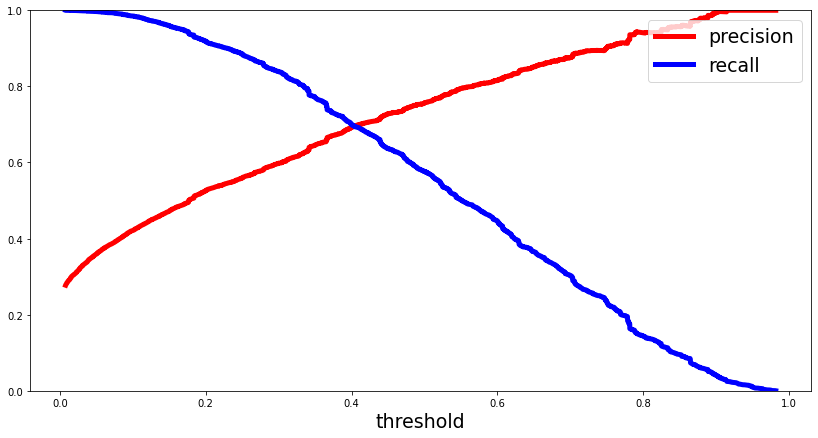

In [42]:
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

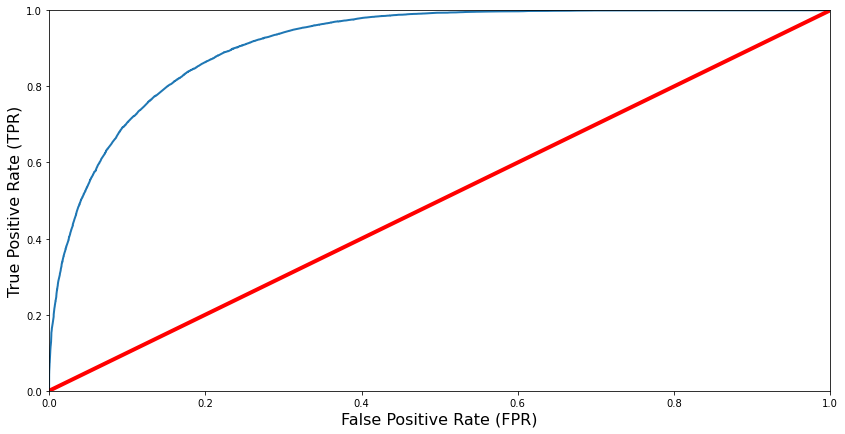

In [43]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC AUC Score:", r_a_score)

ROC AUC Score: 0.9148679266328047


In [45]:
final_project = pd.DataFrame({'id':df_test['id'], 'Gaji':y_pred})
final_project

,id,Gaji
0,35994,0
1,35995,0
2,35996,1
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


In [47]:
final_project.to_csv('/content/drive/My Drive/Final Project JointsCamp/final_project.csv', index=False)